# ANALYSIS OF EARTHQUAKES

## Importing the basic libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

import folium

## Reading the data

In [2]:
quake=pd.read_excel('D:/WORK/UNIVERSITY PROJECTS/A NOVEL APPROACH TO ANALYSE AND PREDICT EARTHQUAKE PATTERNS/modified earthquake data.xlsx')

quake.head()

,Unnamed: 0,locearthquake,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,time,dist_from_location
0,0,"18 km SW of Malango, Solomon Islands",7.0,22-11-2022,8,7,0,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",02:03,18
1,1,"204 km SW of Bengkulu, Indonesia",6.9,18-11-2022,4,4,0,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",13:37,204
2,3,"205 km ESE of Neiafu, Tonga",7.3,11-11-2022,5,5,0,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",10:48,205
3,5,south of the Fiji Islands,7.0,09-11-2022,4,3,0,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.381,the Fiji Islands,09:51,94
4,6,south of the Fiji Islands,6.8,09-11-2022,1,3,0,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.363,the Fiji Islands,09:38,94


## Gathering basics from the data

In [3]:
quake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          777 non-null    int64  
 1   locearthquake       777 non-null    object 
 2   magnitude           777 non-null    float64
 3   date_time           777 non-null    object 
 4   cdi                 777 non-null    int64  
 5   mmi                 777 non-null    int64  
 6   alert               777 non-null    int64  
 7   tsunami             777 non-null    int64  
 8   sig                 777 non-null    int64  
 9   net                 777 non-null    object 
 10  nst                 777 non-null    int64  
 11  dmin                777 non-null    float64
 12  gap                 777 non-null    float64
 13  magType             777 non-null    object 
 14  depth               777 non-null    float64
 15  latitude            777 non-null    float64
 16  longitud

### Statistical Measures

In [4]:
quake.describe()

,Unnamed: 0,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,dist_from_location
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,392.576577,6.941647,4.342342,5.978121,0.275418,0.384813,870.804376,231.211068,1.312927,25.014788,74.232314,3.668359,52.790185,94.407979
std,224.998143,0.446767,3.173045,1.452259,0.814701,0.486865,323.315975,250.648184,2.215283,24.287392,134.545639,27.235589,117.503708,114.509756
min,0.000000,6.500000,0.000000,1.000000,0.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,1.000000
25%,198.000000,6.600000,0.000000,5.000000,0.000000,0.000000,691.000000,0.000000,0.000000,14.200000,14.000000,-14.344000,-71.649000,41.000000
50%,393.000000,6.800000,5.000000,6.000000,0.000000,0.000000,754.000000,142.000000,0.000000,20.000000,26.000000,-2.486000,108.174000,90.000000
75%,587.000000,7.100000,7.000000,7.000000,0.000000,1.000000,910.000000,445.000000,1.822000,30.000000,48.000000,24.696000,148.887000,118.000000
max,781.000000,9.100000,9.000000,9.000000,3.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2011.000000


In [5]:
quake.isnull().sum()

Unnamed: 0            0
locearthquake         0
magnitude             0
date_time             0
cdi                   0
mmi                   0
alert                 0
tsunami               0
sig                   0
net                   0
nst                   0
dmin                  0
gap                   0
magType               0
depth                 0
latitude              0
longitude             0
location              0
time                  0
dist_from_location    0
dtype: int64

### Found a unnecessary extra variable 'Unnamed: 0' which is of no use. Fuck you

In [6]:
quake.drop('Unnamed: 0',axis=1,inplace=True)

quake.head(3)

,locearthquake,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,time,dist_from_location
0,"18 km SW of Malango, Solomon Islands",7.0,22-11-2022,8,7,0,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,"Malango, Solomon Islands",02:03,18
1,"204 km SW of Bengkulu, Indonesia",6.9,18-11-2022,4,4,0,0,735,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,"Bengkulu, Indonesia",13:37,204
2,"205 km ESE of Neiafu, Tonga",7.3,11-11-2022,5,5,0,1,833,us,149,1.865,21.0,mww,37.0,-19.2918,-172.129,"Neiafu, Tonga",10:48,205


## Visualizations

### Earthquakes in certain locations of the World

In [7]:
map = folium.Map()

for index, row in quake.iterrows():
    
    location = (row['latitude'], row['longitude'])
    
    marker = folium.Marker(location)
    
    marker.add_to(map)

map.save('scatter_plot.html')

map

### Correlation between Magnitude and Sig (Significance of the event occured)

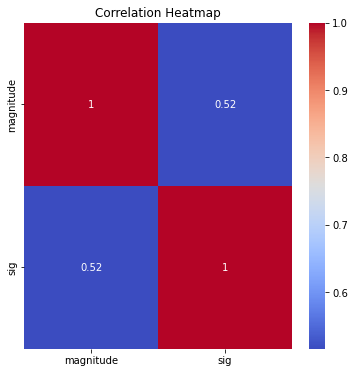

In [8]:
plt.figure(figsize=(6, 6))

sns.heatmap(quake[['magnitude', 'sig']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

### Yearly counts of the Earthquakes

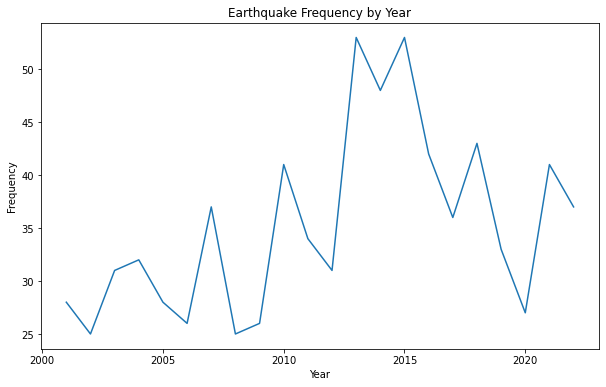

In [9]:
# Convert the 'date' column to datetime format

quake['date'] = pd.to_datetime(quake['date_time'])

# Group the data by year and count the occurrences

yearly_counts = quake.groupby(quake['date'].dt.year).size()

plt.figure(figsize=(10, 6))

plt.plot(yearly_counts.index, yearly_counts.values)

plt.xlabel('Year')

plt.ylabel('Frequency')

plt.title('Earthquake Frequency by Year')

plt.show()

### Distribution Frequency of the Magnitudes of the Earthquakes

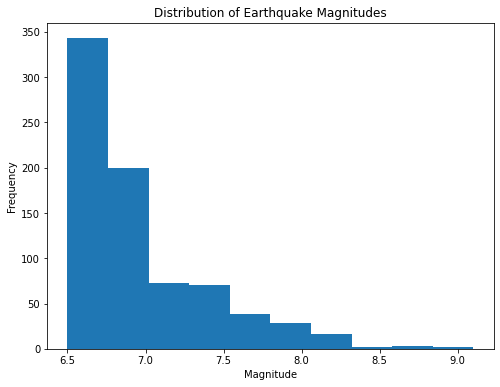

In [10]:
plt.figure(figsize=(8, 6))

plt.hist(quake['magnitude'], bins=10)

plt.xlabel('Magnitude')

plt.ylabel('Frequency')

plt.title('Distribution of Earthquake Magnitudes')

plt.show()

### Occurence of each Depth Category

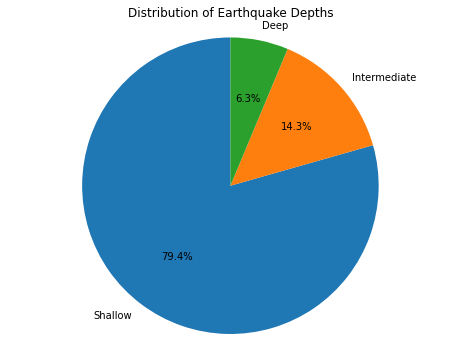

In [11]:
# Define the categories for the pie chart

categories = ['Shallow', 'Intermediate', 'Deep']

depth_counts = quake['depth'].apply(lambda x: categories[0] if x <= 70 else (categories[1] if x <= 300 else categories[2])).value_counts()

# Plot the pie chart

plt.figure(figsize=(8, 6))

plt.pie(depth_counts, labels=depth_counts.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Distribution of Earthquake Depths')

plt.show()

### Chloropleth map to visualize number of earthquakes in each location in a Scale of "5"-"7"

In [12]:
# Create a base map centered at a specific location

map_center = [quake['latitude'].mean(), quake['longitude'].mean()]

map_zoom = 2

map = folium.Map(location=map_center, zoom_start=map_zoom)

# Iterate over the earthquake data and add polygon markers

for index, row in quake.iterrows():
    
    magnitude = row['magnitude']
    
    location = row['location']
    
    lat = row['latitude']
    
    lon = row['longitude']

    # Define the polygon marker color based on magnitude
    
    color = 'red' if magnitude >= 7 else 'orange' if magnitude >= 6 else 'yellow' if magnitude >= 5 else 'green'

    # Create a polygon marker for each earthquake location
    
    folium.RegularPolygonMarker(
        
        location=[lat, lon],
        
        number_of_sides=4,
        
        radius=6,
        
        color=color,
        
        fill_color=color,
        
        fill_opacity=0.7,
    
    ).add_to(map)

# Display the map

map.save('choropleth_map.html')

map

### 3D Plot of the Earthquake Locations

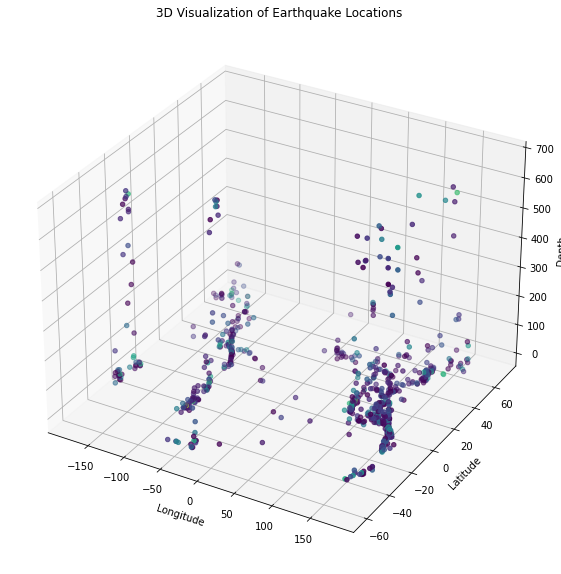

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(quake['longitude'], quake['latitude'], quake['depth'], c=quake['magnitude'], cmap='viridis')

ax.set_xlabel('Longitude')

ax.set_ylabel('Latitude')

ax.set_zlabel('Depth')

ax.set_title('3D Visualization of Earthquake Locations')

plt.show()

## Basic Preprocessing steps:

### First of all we should extract some necessary variables that can have an impact for the modelling purpose i.e., to calculate how Significant can the event be.

#### 1) Magnitude: The magnitude of an earthquake is a fundamental measure of its strength and can potentially have a significant impact on its significance.

#### 2) Depth: The depth at which an earthquake occurs can influence its effects and severity.

#### 3) Latitude and Longitude: The geographic location of an earthquake may play a role in its significance, as different regions have varying levels of vulnerability and infrastructure.

#### 4) CDI (Community Internet Intensity Map) and MMI (Modified Mercalli Intensity): These variables represent the intensity of shaking at specific locations and can provide valuable information about the perceived effects of an earthquake.

#### 5) Distance from Location: The distance between the earthquake epicenter and a specific location may affect the severity of the impact.

#### 6) Time: The timing of an earthquake could potentially be a factor in its significance, as it may impact population density, preparedness, or response capabilities.

### We need to extract the month and hour from the "Time" column since it is not feasible to use the "Time" column as a date format as it can result in inaccurate decision making.

#### Also another reason for using the "Month" column is that we can expect the significance to be more during the rainy season months and somewhat less during the winter season. Also "hour" can decide how many people can get affected from the disaster. If it is a daytime there is a higher chance of more casualty. But if it is nightime the number of casualty can be less.

In [14]:
# Preprocess the time column

quake['time'] = pd.to_datetime(quake['time'])  # Convert time column to datetime format

quake['month'] = quake['time'].dt.month  # Extract the month

quake['hour'] = quake['time'].dt.hour  # Extract the month

### Select the independent variables and target variable.

In [15]:
independent_cols = ['magnitude', 'depth', 'latitude', 'longitude', 'cdi', 'mmi', 'month', 'hour']

target_col = 'sig'

In [16]:
# Select the preprocessed independent variables and target variable

X = quake[independent_cols]

y = quake[target_col]

### Performing transformation techniques on variables with different scales can be beneficial for regression models since there is difference in the scales of likes of (Latitude, Longitude) and (cdi, mmi, Magnitude, etc.,).

### Standard scaling : Also known as z-score normalization, is commonly used to transform the data to have zero mean and unit variance. It is a popular choice when dealing with features that have different scales, as it helps to bring all the features to a similar scale.

#### But we cannot entirely rely on this scaling technique because as long we dont evaluate our model we cant conclude that Standard Scaler is the appropriate scaler for us.

In [17]:
# Perform scaling on the Independent columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X[['magnitude', 'latitude', 'longitude', 'cdi', 'mmi', 'depth']])

### Now lets check the distribution of our Target variable i.e.,"sig".

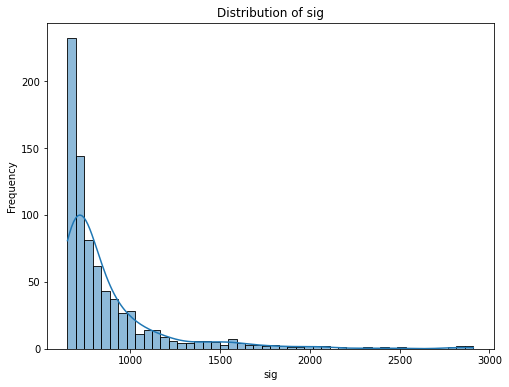

Skewness: 3.0672675892510757


In [18]:
from scipy import stats

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(quake['sig'], kde=True)
plt.xlabel('sig')
plt.ylabel('Frequency')
plt.title('Distribution of sig')
plt.show()

# Check skewness of the target variable
skewness = stats.skew(quake['sig'])
print(f"Skewness: {skewness}")

### A skewness value of 3.067 indicates that the distribution of the target variable is positively skewed. Positive skewness means that the tail of the distribution is extended towards higher values, and the bulk of the data is concentrated towards lower values.

### But since the data exhibits significant skewness, it is often beneficial to apply a transformation to make the distribution more symmetric.

### Log transformation: Taking the logarithm of the target variable can help reduce skewness. This transformation is commonly used when the target variable spans several orders of magnitude and exhibits exponential growth patterns.

#### But in this case too, we cannot entirely rely on this transformation technique because as long we dont evaluate our model we cant conclude that Log Transformation is the appropriate scaler for us.

In [19]:
# Apply log transformation to the target variable

y_transformed = np.log(y)

# Check the skewness of the transformed variable

skewness_transformed = stats.skew(y_transformed)

print(f"Skewness (transformed): {skewness_transformed}")

Skewness (transformed): 1.88168372502222


### Merging the scaled features with the remaining features.

In [20]:
X = pd.concat([X.drop(['magnitude', 'latitude', 'longitude', 'cdi', 'mmi', 'depth'], axis=1),
               
               pd.DataFrame(X_scaled, columns=['magnitude', 'latitude', 'longitude', 'cdi', 'mmi', 'depth'])], axis=1)

## Model Building

### Split the data into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

### LINEAR REGRESSION

### Create and train the regression model.

#### A TransformedTargetRegressor is used to wrap the model and handle the transformation during model training and prediction.

In [22]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model

model = LinearRegression()

# Fit the transformed model

model.fit(X_train, y_train)

LinearRegression()

### Make predictions using the model.

In [23]:
y_pred = model.predict(X_test)

## Evaluate the model

### Calculate the R-squared score.

#### The R-squared (coefficient of determination) score is a statistical measure that indicates the proportion of the variance in the dependent variable (target variable) that can be explained by the independent variables in a regression model. It provides an assessment of how well the regression model fits the observed data.

In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.4978347451965417


### Calculate the Mean Squared Error.

#### Mean Squared Error (MSE) is a commonly used metric to measure the average squared difference between the predicted values and the actual values in a regression problem. It quantifies the average squared deviation or error between the predicted and actual values.

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.17935905811282654


### From the above evaluation it is found that the Linear model is giving a very less accuracy i.e., 49% along with a high Mean Squared Error.

### So, now we can try out some Non-linear models and check wheather they can make a good prediction or not.

In [26]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model

model_dt = DecisionTreeRegressor()

# Fit the model

model_dt.fit(X_train, y_train)

# Make predictions

y_pred_dt = model_dt.predict(X_test)

# Calculate the R-squared score

r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - R-squared: {r2_dt}")

Decision Tree Regression - R-squared: 0.29288931882758185


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model

model_rf = RandomForestRegressor()

# Fit the model

model_rf.fit(X_train, y_train)

# Make predictions

y_pred_rf = model_rf.predict(X_test)

# Calculate the R-squared score

r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - R-squared: {r2_rf}")

Random Forest Regression - R-squared: 0.691103140294187


In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features

poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(X_train)

# Create a Polynomial Regression model

model_poly = LinearRegression()

# Fit the model

model_poly.fit(X_poly, y_train)

# Transform the test data

X_test_poly = poly_features.transform(X_test)

# Make predictions

y_pred_poly = model_poly.predict(X_test_poly)

# Calculate the R-squared score

r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - R-squared: {r2_poly}")

Polynomial Regression - R-squared: 0.6294551797282936


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model

model_gb = GradientBoostingRegressor()

# Fit the model

model_gb.fit(X_train, y_train)

# Make predictions

y_pred_gb = model_gb.predict(X_test)

# Calculate the R-squared score

r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - R-squared: {r2_gb}")

Gradient Boosting Regression - R-squared: 0.6498953182462269


In [30]:
from xgboost import XGBRegressor

# Create an XGBoost Regression model

model_xgb = XGBRegressor()

# Fit the model

model_xgb.fit(X_train, y_train)

# Make predictions

y_pred_xgb = model_xgb.predict(X_test)

# Calculate the R-squared score

r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - R-squared: {r2_xgb}")

XGBoost Regression - R-squared: 0.5868788804197966


In [31]:
from lightgbm import LGBMRegressor

# Create a LightGBM Regression model

model_lgb = LGBMRegressor()

# Fit the model

model_lgb.fit(X_train, y_train)

# Make predictions

y_pred_lgb = model_lgb.predict(X_test)

# Calculate the R-squared score

r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Regression - R-squared: {r2_lgb}")

LightGBM Regression - R-squared: 0.6430588090168043


### We tried various Non-linear models i.e., Decision Tree Regressor, Random Forest Regressor, Polynomial Regression, Gradient Boosting Regression, Extra Gradient Boosting Regression and Light Gradient Boosting Regression.

### Among all of them Random Forest Regression gave the highest accuracy (69%) but still that sort of accuracy cannot be relied upon and concluded that it is a good prediction model. Maybe some more advanced preprocessing techniques and model building can provide a more precise outcome.

# THANKS FOR YOUR TIME.